In [1]:
import abc

In [2]:
import numpy as np

In [3]:
np.seterr(all='raise', under='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [4]:
np.set_printoptions(precision=20)

---

In [5]:
import simple_nn.layers.components.activation as actv
import simple_nn.gd_updater as gd_upd

In [6]:
from simple_nn.layers.nn_layer import FCLayer
from simple_nn.nn_model import NNModel
from simple_nn.cost_function import *

---

batch norm

In [7]:
#TODO: BatchNorm

---

test - regression

In [8]:
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import metrics

In [9]:
test_data = sklearn.datasets.load_boston(return_X_y=False)

In [10]:
test_data_x_org = test_data['data']
test_data_y_org = test_data['target']

In [11]:
test_data_x_org.shape

(506, 13)

In [12]:
test_data_std = (test_data_x_org - np.mean(test_data_x_org, axis=0)) / np.std(test_data_x_org, axis=0)

In [13]:
test_data_x = test_data_std[:450]
test_data_y = test_data_y_org[:450]

In [14]:
learning_rate = 0.01

In [15]:
rounds = 2000

In [16]:
batch_size = 50

In [17]:
m = NNModel(test_data_x.shape[1],
            gd_upd.GDUpdaterAdam(),
            cost_function=SquaredLoss())

In [18]:
# m.add_layer(FCLayer(20, False, ActivationNone()))
m.add_layer(FCLayer(node_count=10, activation=actv.ActivationLeakyRelu()))
m.add_layer(FCLayer(node_count=1, activation=actv.ActivationLeakyRelu()))

In [19]:
%%time
all_cost = []
for _ in range(rounds):
    cost = 0
    cost_ce = 0
    learning_idx = np.arange(len(test_data_x))
    np.random.shuffle(learning_idx)
    
    for start_idx in range(0, len(test_data_x), batch_size):
        data_idx = learning_idx[start_idx : min(start_idx+batch_size,len(test_data_x))]
#         data_idx = learning_idx[start_idx]
        sample, target = test_data_x[data_idx], test_data_y[data_idx,None]
        predict = m.model_forward(sample)
        m.update_model(predict, target)
        cost += (m.cost_function.loss(predict, target)).sum()
    all_cost.append(cost)

Wall time: 3.85 s


In [20]:
all_cost[-1]

1652.5152573395121

In [21]:
plt.figure(figsize=(15,6))
plt.plot(all_cost)

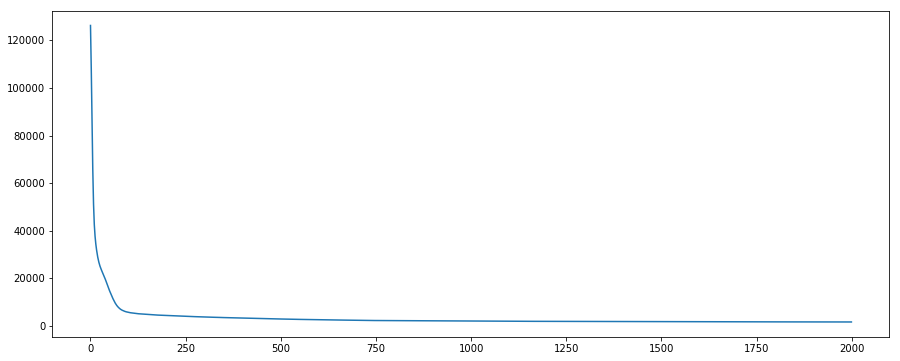

In [22]:
plt.show()

In [23]:
predict_data_x = test_data_std[450:]
predict_data_y = test_data_y_org[450:]

In [24]:
predict_y = []
for sample, tgt in zip(predict_data_x, predict_data_y):
    pct = m.predict(sample)
    predict_y.append(pct)

In [25]:
metrics.mean_squared_error(predict_data_y, predict_y)

14.102988538271859

test - logistic

In [26]:
test_iris = sklearn.datasets.load_iris(return_X_y=False)

In [27]:
test_data_x_org = test_iris['data']
test_data_y_org = test_iris['target']

In [28]:
test_data_x_org.shape

(150, 4)

In [29]:
test_data_std = (test_data_x_org - np.mean(test_data_x_org, axis=0)) / np.std(test_data_x_org, axis=0)

In [30]:
test_data_y_encoded = np.zeros((150,3))
test_data_y_encoded[np.arange(150),test_data_y_org] = 1

In [31]:
test_data_x = test_data_std
test_data_y = test_data_y_encoded

In [32]:
learning_rate = 0.001

In [33]:
rounds = 10000

In [34]:
batch_size = 15

In [35]:
m = NNModel(test_data_x.shape[1],
            gd_upd.GDUpdaterRMSprop(learning_rate=learning_rate),
            cost_function=CrossEntropy())

In [36]:
# m.add_layer(FCLayer(20, False, ActivationNone()))
m.add_layer(FCLayer(node_count=6, activation=actv.ActivationLeakyRelu()))
m.add_layer(FCLayer(node_count=3, activation=actv.ActivationSoftmax()))

In [37]:
%%time
all_cost = []
for _ in range(rounds):
    cost = 0
    cost_ce = 0
    learning_idx = np.arange(len(test_data_x))
    np.random.shuffle(learning_idx)
    
    for start_idx in range(0, len(test_data_x), batch_size):
        data_idx = learning_idx[start_idx : min(start_idx+batch_size,len(test_data_x))]
#         data_idx = learning_idx[start_idx]
        sample, target = test_data_x[data_idx], test_data_y[data_idx]
        predict = m.model_forward(sample)
        m.update_model(predict, target)
        cost += (m.cost_function.loss(predict, target)).sum()
    all_cost.append(cost)

Wall time: 28 s


In [38]:
all_cost[-1]

64.895127712497498

In [39]:
plt.figure(figsize=(15,6))
plt.plot(all_cost)

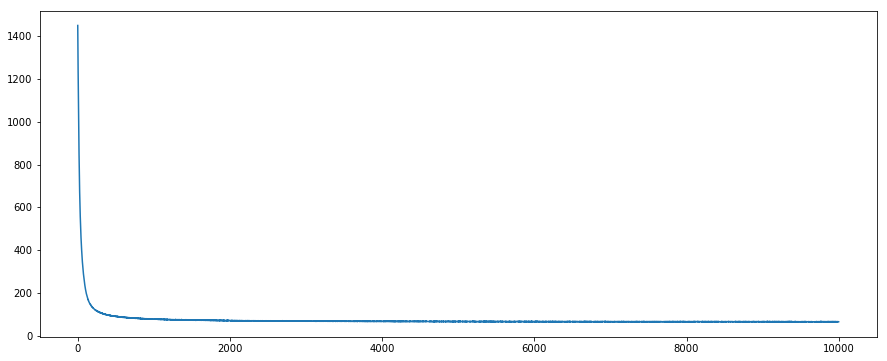

In [40]:
plt.show()

In [41]:
predict_data_x = test_data_std
predict_data_y = test_data_y_encoded

In [42]:
predict_y = []
predict_result = []
for sample, tgt in zip(predict_data_x, predict_data_y):
    pct = m.predict(sample)
    predict_result.append(pct)
    res = np.argmax(pct)
    predict_y.append(res)

In [43]:
predict_result

[array([  9.99999999701733921498e-01,   2.98266101222488410071e-10,
          1.81666870742424342655e-28]),
 array([  9.99999917802328330829e-01,   8.21976716795288503081e-08,
          1.83812568821036109184e-25]),
 array([  9.99999999934770622545e-01,   6.52292740769738588546e-11,
          1.72117644491533995185e-28]),
 array([  9.99999999689100249611e-01,   3.10899664154813256167e-10,
          6.09437776986089709961e-27]),
 array([  9.99999999988247845195e-01,   1.17521310358916176992e-11,
          1.11548524960894227592e-29]),
 array([  9.99999999463466293648e-01,   5.36533723486788208244e-10,
          3.72247290360669685338e-27]),
 array([  9.99999999998555377800e-01,   1.44452402184452718679e-12,
          3.15094102354336100044e-29]),
 array([  9.99999999273326833915e-01,   7.26673199521556480296e-10,
          1.59754710949018110628e-27]),
 array([  9.99999999753530488533e-01,   2.46469600013717967962e-10,
          7.21950018486057508524e-27]),
 array([  9.9999998229096431

In [44]:
metrics.confusion_matrix(predict_data_y.argmax(axis=1), predict_y)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])